In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist,cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras.models import Model
from sklearn.metrics import classification_report
import numpy as np
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten,Input,Dense, Dropout
tf.config.list_physical_devices()

2024-11-06 12:38:07.963915: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-06 12:38:07.976986: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-06 12:38:07.981728: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-06 12:38:07.990494: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-11-06 12:38:08.731663: W tensorflow/compiler/tf2

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

load in data

In [2]:
data_folder = os.sep.join(['data', 'ds1'])
data_filename = 'images.npy'
labels_filename = 'labels.npy'
data = np.load(os.sep.join([data_folder, data_filename]))
data = data/255
labels = np.load(os.sep.join([data_folder, labels_filename]))

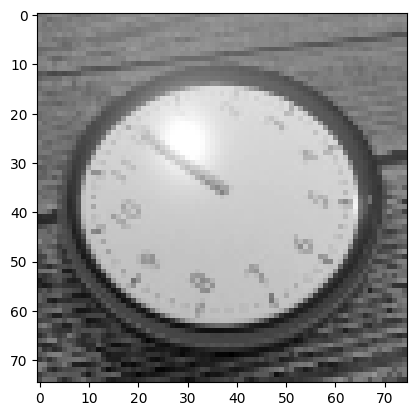

In [3]:
plt.imshow(data[0,:,:], cmap='gray')
plt.show()

In [4]:
def compute_time_error(predicted, actual):
    predicted_minutes = predicted[0] * 60 + predicted[1]
    actual_minutes = actual[0] * 60 + actual[1]
    biggest = max(predicted_minutes, actual_minutes)
    smallest = min(predicted_minutes, actual_minutes)
    time_error = min(biggest - smallest, 720 - biggest + smallest)
    return time_error

In [5]:
# Sample examples
print(compute_time_error([11, 55], [0, 5]))
print(compute_time_error([0, 5], [11, 55]))
print(compute_time_error([1, 15], [1, 00]))
print(compute_time_error([0, 45], [1, 00]))

10
10
15
15


In [6]:
def time_to_class(labels, min_per_bin : int = 30):
  h, m = labels.T
  return 60//min_per_bin*h +m//min_per_bin

labels_class = time_to_class(labels, 5) # 720 classes
num_labels = len(np.unique(labels_class))

In [ ]:
def simple_classification_model_sequential(input_shape,num_labels):
    """
    Builds a simplified classification model for time using Sequential API.

    This model has two Conv -> Pool -> Dropout blocks,
    followed by a Dense output layer with N classes.
    """
    model = Sequential()
    model.add(Input(shape=input_shape))
    # First Conv block
    model.add(Conv2D(16, (3, 3), padding="same", activation="relu"))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.3))

    # Second Conv block
    model.add(Conv2D(32, (3, 3), padding="same", activation="relu"))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.3))

    # Flatten and Dense layers
    model.add(Flatten())
    model.add(Dense(128, activation="relu"))
    model.add(Dropout(0.3))

    # Output layer with 720 classes (for time classification)
    model.add(Dense(num_labels, activation="softmax"))

    return model
image_shape = (*data.shape[1:],1) 
model = simple_classification_model_sequential(image_shape, num_labels)
model.summary()

I0000 00:00:1730893090.752685   39723 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1730893090.752783   39723 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1730893090.752821   39723 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1730893090.909266   39723 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1730893090.909332   39723 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-11-06

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 75, 75, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 37, 37, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 37, 37, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 37, 37, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 18, 18, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 18, 18, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 10368)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,327,232 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 144)            │        18,576 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,350,608 (5.15 MB)

 Trainable params: 1,350,608 (5.15 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
model.compile(loss='sparse_categorical_crossentropy',
                  optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                  metrics=['accuracy'],
                  )

In [9]:
X_train, X_test, y_train, y_test = train_test_split(data, labels_class, test_size=0.2, random_state=42)  # random state is to set a seed

In [13]:
history_model = model.fit(X_train, y_train, # rescale the data to a (0, 1) range
                              batch_size=32, validation_data=(X_test, y_test),
                              epochs=100, shuffle=True)
model.save_weights('weights_model_with_shuffle_2a.weights.h5')

Epoch 1/100
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3065 - loss: 2.2434 - val_accuracy: 0.3831 - val_loss: 1.9319
Epoch 2/100
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3149 - loss: 2.2220 - val_accuracy: 0.3661 - val_loss: 1.9621
Epoch 3/100
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3117 - loss: 2.2404 - val_accuracy: 0.3892 - val_loss: 1.9521
Epoch 4/100
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3110 - loss: 2.2256 - val_accuracy: 0.3758 - val_loss: 1.9905
Epoch 5/100
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3111 - loss: 2.2522 - val_accuracy: 0.3961 - val_loss: 1.8841
Epoch 6/100
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3068 - loss: 2.2260 - val_accuracy: 0.3925 - val_loss: 1.8971
Epoch 7/100
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3192 - loss: 2.2237 - val_accuracy: 0.3758 - val_loss: 1.9237
Epoch 8/100
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3103 - loss: 2.2283 - val_accu